# Image Classification With Transfer Learning in Keras

# Task 1: Importing Libraries

In [1]:
import tensorflow as tf
import tarfile
import urllib
import os
import numpy as np
import pets

from matplotlib import pyplot as plt
%matplotlib inline

data_dir = 'data/'
if not os.path.isdir(data_dir):
    os.mkdir(data_dir)

print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.5.0
Is using GPU? []


# Task 2: Cats vs Dogs Dataset

In [3]:
# Download the training/test data to /u04/CNN/data/pets
urls = [
    'http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz',
    'http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz'
]
for url in urls:
    target_file = url.split('/')[-1]
    download_dir = '/u04/CNN/data/pets'
    print('Downloading: ', url)
    urllib.request.urlretrieve(url, os.path.join(download_dir, target_file))

Downloading:  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Downloading:  http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz


In [2]:
from os import sep

class_to_index = {'cat': 0, 'dog': 1}
index_to_class = {0: 'cat', 1: 'dog'}

train_annot_path = sep.join(['','u04','CNN','data','pets','annotations','trainval.txt'])
test_annot_path = sep.join(['','u04','CNN','data','pets','annotations','test.txt'])

train_annot, count_train = pets.cats_vs_dogs_annotations(train_annot_path)
test_annot, count_test = pets.cats_vs_dogs_annotations(test_annot_path)

print('Training examples count:', count_train)
print('Test examples count:', count_test)

Training examples count: 3680
Test examples count: 3669


In [3]:
train_annot

{'Abyssinian_100.jpg': 'cat',
 'Abyssinian_101.jpg': 'cat',
 'Abyssinian_102.jpg': 'cat',
 'Abyssinian_103.jpg': 'cat',
 'Abyssinian_104.jpg': 'cat',
 'Abyssinian_105.jpg': 'cat',
 'Abyssinian_106.jpg': 'cat',
 'Abyssinian_107.jpg': 'cat',
 'Abyssinian_108.jpg': 'cat',
 'Abyssinian_109.jpg': 'cat',
 'Abyssinian_10.jpg': 'cat',
 'Abyssinian_110.jpg': 'cat',
 'Abyssinian_111.jpg': 'cat',
 'Abyssinian_112.jpg': 'cat',
 'Abyssinian_113.jpg': 'cat',
 'Abyssinian_114.jpg': 'cat',
 'Abyssinian_115.jpg': 'cat',
 'Abyssinian_116.jpg': 'cat',
 'Abyssinian_117.jpg': 'cat',
 'Abyssinian_118.jpg': 'cat',
 'Abyssinian_119.jpg': 'cat',
 'Abyssinian_11.jpg': 'cat',
 'Abyssinian_120.jpg': 'cat',
 'Abyssinian_121.jpg': 'cat',
 'Abyssinian_122.jpg': 'cat',
 'Abyssinian_123.jpg': 'cat',
 'Abyssinian_124.jpg': 'cat',
 'Abyssinian_125.jpg': 'cat',
 'Abyssinian_126.jpg': 'cat',
 'Abyssinian_127.jpg': 'cat',
 'Abyssinian_128.jpg': 'cat',
 'Abyssinian_129.jpg': 'cat',
 'Abyssinian_12.jpg': 'cat',
 'Abyssinian_

In [4]:
test_annot

{'Abyssinian_201.jpg': 'cat',
 'Abyssinian_202.jpg': 'cat',
 'Abyssinian_204.jpg': 'cat',
 'Abyssinian_205.jpg': 'cat',
 'Abyssinian_206.jpg': 'cat',
 'Abyssinian_207.jpg': 'cat',
 'Abyssinian_20.jpg': 'cat',
 'Abyssinian_210.jpg': 'cat',
 'Abyssinian_212.jpg': 'cat',
 'Abyssinian_213.jpg': 'cat',
 'Abyssinian_215.jpg': 'cat',
 'Abyssinian_216.jpg': 'cat',
 'Abyssinian_217.jpg': 'cat',
 'Abyssinian_219.jpg': 'cat',
 'Abyssinian_21.jpg': 'cat',
 'Abyssinian_220.jpg': 'cat',
 'Abyssinian_221.jpg': 'cat',
 'Abyssinian_223.jpg': 'cat',
 'Abyssinian_224.jpg': 'cat',
 'Abyssinian_225.jpg': 'cat',
 'Abyssinian_226.jpg': 'cat',
 'Abyssinian_228.jpg': 'cat',
 'Abyssinian_22.jpg': 'cat',
 'Abyssinian_230.jpg': 'cat',
 'Abyssinian_232.jpg': 'cat',
 'Abyssinian_24.jpg': 'cat',
 'Abyssinian_25.jpg': 'cat',
 'Abyssinian_26.jpg': 'cat',
 'Abyssinian_27.jpg': 'cat',
 'Abyssinian_29.jpg': 'cat',
 'Abyssinian_2.jpg': 'cat',
 'Abyssinian_30.jpg': 'cat',
 'Abyssinian_31.jpg': 'cat',
 'Abyssinian_32.jpg': 

# Task 3: Get Random Batch

In [6]:
image_dir = sep.join(['','u04','CNN','data','pets','images'])

def get_random_batch(annot, batch_size=4):
    all_keys = list(annot.keys())
    total_examples = len(all_keys)
    indices = np.random.choice(range(total_examples), batch_size)
    x = np.zeros((batch_size, 128, 128, 3))
    y = np.zeros((batch_size, 1))
    images = []
    
    for i, index in enumerate(indices):
        image = tf.keras.preprocessing.image.load_img(os.path.join(image_dir, all_keys[index]),
                                                     target_size=(128, 128))
        images.append(image)
        arr = tf.keras.preprocessing.image.img_to_array(image)
        arr = tf.keras.applications.mobilenet_v2.preprocess_input(arr)
        arr = np.expand_dims(arr, axis=0)
        x[i] = arr
        y[i] = class_to_index[annot[all_keys[index]]]
    
    return x, y, images

Displaying first 8 examples..


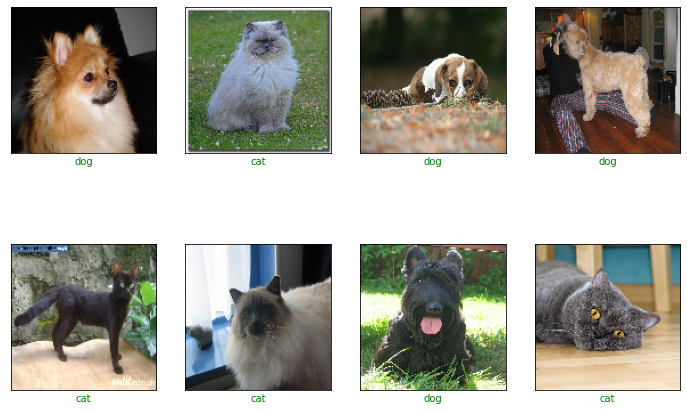

In [7]:
x, y, images = get_random_batch(train_annot, batch_size=8)
pets.display_examples(x, y, y, images, index_to_class).show()

# Task 4: Create Model

In [8]:
mnet = tf.keras.applications.mobilenet_v2.MobileNetV2(
    include_top=False,
    input_shape=(128, 128, 3),
    pooling='avg',
    weights='imagenet'
)
mnet.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 64, 64, 32)   0           bn_Conv1[0][0]                   
________________

In [9]:
def create_model():
    model = tf.keras.models.Sequential([
        mnet,
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.layers[0].trainable = False
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Functi (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


# Task 5: Model Training

In [10]:
def data_generator(batch_size, annot):
    while True:
        x, y, _ = get_random_batch(annot, batch_size)
        yield (x, y)

In [11]:
batch_size = 32
steps_per_epoch = int(len(list(train_annot.keys()))/batch_size)
validation_steps = int(len(list(test_annot.keys()))/batch_size)

print('Steps per epoch:', steps_per_epoch)
print('Validation steps:', validation_steps)

Steps per epoch: 115
Validation steps: 114


In [15]:
%%time

_ = model.fit(
    data_generator(batch_size, train_annot),
    validation_data=data_generator(batch_size, test_annot),
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    epochs=1
)

115/115 [==============================] - 44s 384ms/step - loss: 0.1132 - acc: 0.9628 - val_loss: 0.0791 - val_acc: 0.9745
CPU times: user 2min 6s, sys: 27 s, total: 2min 33s
Wall time: 44.1 s


# Task 6: Predictions

Displaying first 8 examples..


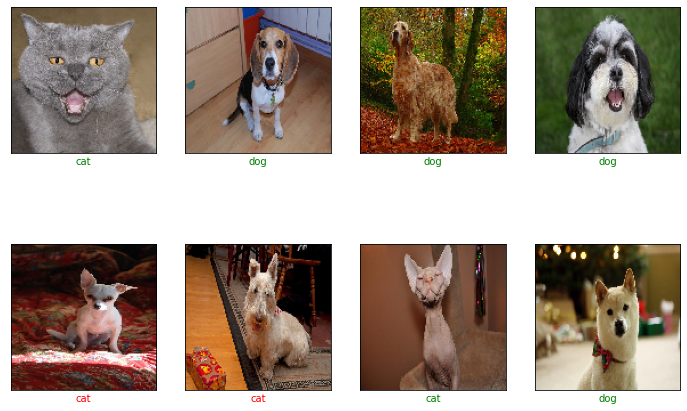

In [14]:
x, y, images = get_random_batch(test_annot, batch_size=8)
preds = model.predict(x)
pets.display_examples(x, y, preds, images, index_to_class).show()